# Here the benchmarking plots are created for the original MS2DeepScore model
The model was trained with MS2DeepScore 0.2.0, however for the benchmarking plots (here) MS2DeepScore 2.5.2 is required, since the plotting functions did not exist before. The matrix with predictions should therefore already be calculated (in the other notebooks in this folder).

In [34]:
import requests
import os
from tqdm import tqdm

def download_file(link, file_name):
    response = requests.get(link, stream=True)
    if os.path.exists(file_name):
        print(f"The file {file_name} already exists, the file won't be downloaded")
        return
    total_size = int(response.headers.get('content-length', 0))
    
    with open(file_name, "wb") as f, tqdm(desc="Downloading file", total=total_size, unit='B', unit_scale=True, unit_divisor=1024,) as bar:
        for chunk in response.iter_content(chunk_size=1024):
            if chunk:
                f.write(chunk)
                bar.update(len(chunk))  # Update progress bar by the chunk size
    
neg_test_spectra_file_name = "neg_testing_spectra.mgf"
pos_test_spectra_file_name = "pos_testing_spectra.mgf"
download_file("https://zenodo.org/records/13934470/files/negative_testing_spectra.mgf?download=1", neg_test_spectra_file_name)
download_file("https://zenodo.org/records/13934470/files/positive_testing_spectra.mgf?download=1", pos_test_spectra_file_name)

The file neg_testing_spectra.mgf already exists, the file won't be downloaded
The file pos_testing_spectra.mgf already exists, the file won't be downloaded


### positive spectra

In [16]:
from matchms.importing import load_from_mgf
from tqdm import tqdm
import os

pos_test_spectra_file_name = "pos_testing_spectra.mgf"
pos_test = list(tqdm(load_from_mgf(pos_test_spectra_file_name)))


24911it [00:20, 1243.28it/s]


# Remove structure that cannot be converted and remove spectra without peaks between 10 and 1000

In [17]:
import numpy as np
mz_min=10.0
mz_max=1000.0

pos_test_with_peaks = []
for spectrum in tqdm(pos_test):
    if np.any((spectrum.mz >= mz_min) & (spectrum.mz <= mz_max)):
        if spectrum.get("inchikey")[:14] != "FTXGVGWYYREYSV":
            pos_test_with_peaks.append(spectrum)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24911/24911 [00:02<00:00, 10230.56it/s]


In [18]:
from ms2deepscore.validation_loss_calculation.calculate_scores_for_validation import calculate_tanimoto_scores_unique_inchikey
tanimoto_scores = calculate_tanimoto_scores_unique_inchikey(pos_test_with_peaks, pos_test_with_peaks, fingerprint_type="daylight", nbits=4096)

Calculating fingerprints: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1830/1830 [00:07<00:00, 246.11it/s]


Calculating tanimoto scores


In [19]:
tanimoto_scores

,AAEVYOVXGOFMJO,AAJIHHYEPHRIET,AAQOQKQBGPPFNS,AATPYXMXFBBKFO,ACDCIGNJWLEXTH,ACIJGUBIMXQCMF,ACWOMSOYIIVIRV,ACXYAIZBAYFXGU,ACYXDIZTQDLTCB,ADACAMXIRQREOB,...,ZVPZROOPCVBCES,ZVTBPVGTFNEYQP,ZVXWFPTVHBWJOU,ZWVZORIKUNOTCS,ZXIBCJHYVWYIKI,ZXKWIJYSLSNFLY,ZXLDQJLIBNPEFJ,ZXPRMRWMMPZQED,ZZCHHVUQYRMYLW,ZZMNWJVJUKMZJY
AAEVYOVXGOFMJO,1.000000,0.051604,0.041580,0.068437,0.048913,0.046667,0.078179,0.059242,0.067881,0.061404,...,0.051576,0.060174,0.060678,0.064601,0.062970,0.062793,0.051390,0.063492,0.070126,0.063415
AAJIHHYEPHRIET,0.051604,1.000000,0.032670,0.070707,0.110122,0.065749,0.108295,0.111479,0.138993,0.177827,...,0.093982,0.213178,0.212963,0.095181,0.115954,0.113585,0.082232,0.109677,0.093633,0.102804
AAQOQKQBGPPFNS,0.041580,0.032670,1.000000,0.073762,0.102071,0.054632,0.091278,0.099938,0.074894,0.044586,...,0.076152,0.044586,0.050996,0.076610,0.138144,0.076616,0.097035,0.093164,0.075323,0.078283
AATPYXMXFBBKFO,0.068437,0.070707,0.073762,1.000000,0.116883,0.046561,0.213225,0.199168,0.172503,0.087649,...,0.171491,0.121377,0.128329,0.185000,0.131778,0.187912,0.177333,0.196403,0.182870,0.201316
ACDCIGNJWLEXTH,0.048913,0.110122,0.102071,0.116883,1.000000,0.118936,0.124884,0.139013,0.134615,0.154497,...,0.170583,0.133142,0.133286,0.125984,0.175214,0.130617,0.113433,0.136089,0.116719,0.147929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXKWIJYSLSNFLY,0.062793,0.113585,0.076616,0.187912,0.130617,0.071486,0.423552,0.320849,0.233027,0.144361,...,0.197096,0.224377,0.220882,0.304140,0.244112,1.000000,0.332689,0.394894,0.311839,0.238516
ZXLDQJLIBNPEFJ,0.051390,0.082232,0.097035,0.177333,0.113433,0.055851,0.229953,0.216885,0.172695,0.095804,...,0.158397,0.150922,0.141436,0.223153,0.150404,0.332689,1.000000,0.229176,0.228665,0.183888
ZXPRMRWMMPZQED,0.063492,0.109677,0.093164,0.196403,0.136089,0.076626,0.361979,0.316425,0.230360,0.146161,...,0.189227,0.195339,0.193753,0.267704,0.266602,0.394894,0.229176,1.000000,0.287120,0.261302
ZZCHHVUQYRMYLW,0.070126,0.093633,0.075323,0.182870,0.116719,0.068364,0.291463,0.261204,0.238766,0.120899,...,0.169359,0.186294,0.175527,0.270914,0.173649,0.311839,0.228665,0.287120,1.000000,0.226596


# Load in predictions with MS2DeepScore 0.2.0
These are calculated in calculate_ms2deepscore_predictions_on_test_set

In [20]:
import numpy as np
pos_pos_predictions = np.load('pos_pos_scores.npy')

In [21]:
pos_pos_predictions.shape

(24849, 24849)

### Add the inchikeys as indexes based on the spectra

In [22]:
import numpy as np
mz_min=10.0
mz_max=1000.0

pos_test_with_peaks = []
for spectrum in tqdm(pos_test):
    if np.any((spectrum.mz >= mz_min) & (spectrum.mz <= mz_max)):
        pos_test_with_peaks.append(spectrum)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24911/24911 [00:00<00:00, 32071.24it/s]


In [23]:
len(pos_test_with_peaks)

24849

In [24]:
import pandas as pd
# Extract InChIKeys (first 14 characters) for each spectrum
inchikeys = [spectrum.get("inchikey")[:14] for spectrum in pos_test_with_peaks]

# Create DataFrame with InChIKeys as indexes and columns
predictions_df = pd.DataFrame(pos_pos_predictions, index=inchikeys, columns=inchikeys)

### remove all cases where the inchikey for which no tanimoto can be calculated

In [25]:
predictions_df = predictions_df.drop(index="FTXGVGWYYREYSV")
predictions_df = predictions_df.drop(columns="FTXGVGWYYREYSV")

In [26]:
predictions_df

,SNBMCJOFSMEAOC,SNBMCJOFSMEAOC,SNBMCJOFSMEAOC,SNBMCJOFSMEAOC,SNBMCJOFSMEAOC,SNBMCJOFSMEAOC,WSAMPYWVKZAUBK,WSAMPYWVKZAUBK,WSAMPYWVKZAUBK,WSAMPYWVKZAUBK,...,IKIIZLYTISPENI,VZXPDPZARILFQX,IERHLVCPSMICTF,UZKQTCBAMSWPJD,USVMJSALORZVDV,JJMDCOVWQOJGCB,UHNXUSWGOJMEFO,SYRURBPRFQUYQS,OIUBYZLTFSLSBY,OGYHCBGORZWBPH
SNBMCJOFSMEAOC,1.000000,0.439394,0.443832,0.887920,0.998574,0.408159,0.517240,0.604361,0.653556,0.667032,...,0.178435,0.174307,0.457288,0.447902,0.449789,0.389563,0.161058,0.212098,0.178083,0.330852
SNBMCJOFSMEAOC,0.439394,1.000000,0.972354,0.576646,0.430698,0.974563,0.370590,0.500960,0.462146,0.410034,...,0.457107,0.248257,0.343885,0.371358,0.385552,0.263890,0.500808,0.538671,0.459372,0.229386
SNBMCJOFSMEAOC,0.443832,0.972354,1.000000,0.599365,0.436555,0.985803,0.383188,0.525899,0.473185,0.421667,...,0.461185,0.281993,0.308664,0.368979,0.366985,0.285588,0.525023,0.551889,0.488444,0.236603
SNBMCJOFSMEAOC,0.887920,0.576646,0.599365,1.000000,0.880195,0.565841,0.525779,0.705684,0.705164,0.681069,...,0.277706,0.217871,0.445806,0.459990,0.442033,0.393209,0.265835,0.324411,0.302305,0.296142
SNBMCJOFSMEAOC,0.998574,0.430698,0.436555,0.880195,1.000000,0.401091,0.508357,0.594251,0.645402,0.659027,...,0.178211,0.167433,0.462467,0.444421,0.447497,0.385976,0.160792,0.208151,0.178016,0.327692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
JJMDCOVWQOJGCB,0.389563,0.263890,0.285588,0.393209,0.385976,0.269966,0.476702,0.446615,0.444817,0.470908,...,0.155242,0.232448,0.324553,0.343407,0.334790,1.000000,0.141109,0.172866,0.142952,0.380319
UHNXUSWGOJMEFO,0.161058,0.500808,0.525023,0.265835,0.160792,0.556895,0.106032,0.248102,0.255654,0.131957,...,0.808346,0.102610,0.254739,0.325760,0.310921,0.141109,1.000000,0.904889,0.905284,0.198845
SYRURBPRFQUYQS,0.212098,0.538671,0.551889,0.324411,0.208151,0.593746,0.127333,0.320419,0.314260,0.163781,...,0.810349,0.097200,0.268818,0.369795,0.373302,0.172866,0.904889,1.000000,0.852313,0.221301
OIUBYZLTFSLSBY,0.178083,0.459372,0.488444,0.302305,0.178016,0.518258,0.148974,0.304512,0.292499,0.190533,...,0.782432,0.102955,0.276898,0.411542,0.372333,0.142952,0.905284,0.852313,1.000000,0.210712


In [27]:
from ms2deepscore.validation_loss_calculation.PredictionsAndTanimotoScores import PredictionsAndTanimotoScores
pos_pos_scores = PredictionsAndTanimotoScores(predictions_df, tanimoto_scores, True, label="pos vs pos")

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from ms2deepscore.benchmarking.plot_heatmaps import create_normalized_heatmap_data
def create_heatmap(predictions_and_scores, nr_of_bins, title=""):
    average_pred_per_inchikey_pair = predictions_and_scores.get_average_prediction_per_inchikey_pair()
    minimum_y_axis = average_pred_per_inchikey_pair.min().min()
    maximum_y_axis = average_pred_per_inchikey_pair.max().max()
    # Create bins
    x_bins = np.linspace(0, 1, nr_of_bins + 1)
    y_bins = np.linspace(minimum_y_axis, maximum_y_axis + 0.00001, nr_of_bins + 1)
    
    # Create normalized heatmap data for positive vs positive
    pos_pos_normalized_heatmap = create_normalized_heatmap_data(predictions_and_scores, x_bins, y_bins)
    
    # Get maximum intensity for color scaling (can also use pos_pos_normalized_heatmap.max() directly)
    maximum_heatmap_intensity = pos_pos_normalized_heatmap.max()
    
    # Create figure
    fig, ax = plt.subplots(figsize=(6, 5))
    
    # Plot the heatmap
    im = ax.imshow(pos_pos_normalized_heatmap.T, origin='lower', interpolation='nearest',
                   cmap="inferno", vmax=maximum_heatmap_intensity,
                   extent=[0, 1, minimum_y_axis, maximum_y_axis],
                  )
    
    # Set labels and limits
    ax.set_title(title)
    ax.set_xlabel("True chemical similarity")
    ax.set_ylabel("Predicted chemical similarity")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    
    # Add colorbar
    cbar = fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('Density')
    
    return fig

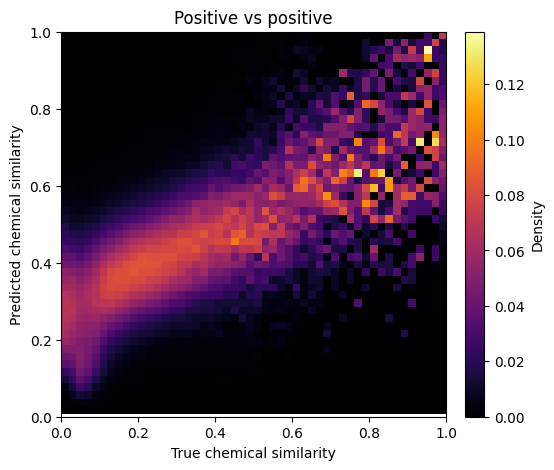

In [98]:
fig = create_heatmap(pos_pos_scores, 50, title="Positive vs positive")
fig.savefig("./heatmap_pos_pos_0_2.svg")

In [91]:
from scipy.stats import pearsonr
import numpy as np
def get_pearson_correlation(scores):
    predictions = scores.get_average_prediction_per_inchikey_pair().to_numpy().flatten()
    tanimoto_scores = scores.tanimoto_df.to_numpy().flatten()
    # the cases where there is only one spectrum against itself result in nan. these values need to be removed
    nan_value_indexes = np.where(np.isnan(predictions))
    predictions_without_nan = np.delete(predictions, nan_value_indexes)
    tanimoto_without_nan = np.delete(tanimoto_scores, nan_value_indexes)
    print(pearsonr(predictions_without_nan, tanimoto_without_nan))
get_pearson_correlation(pos_pos_scores)


PearsonRResult(statistic=0.4180604609686041, pvalue=0.0)


# Negative spectra

In [1]:
from matchms.importing import load_from_mgf
from tqdm import tqdm
import os
neg_test_spectra_file_name = "neg_testing_spectra.mgf"
neg_test = list(tqdm(load_from_mgf(neg_test_spectra_file_name)))

7142it [00:06, 1175.27it/s]


In [2]:
import numpy as np
mz_min=10.0
mz_max=1000.0

neg_test_with_peaks = []
for spectrum in tqdm(neg_test):
    if np.any((spectrum.mz >= mz_min) & (spectrum.mz <= mz_max)):
        neg_test_with_peaks.append(spectrum)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7142/7142 [00:00<00:00, 30507.07it/s]


In [3]:
from ms2deepscore.validation_loss_calculation.calculate_scores_for_validation import calculate_tanimoto_scores_unique_inchikey
neg_tanimoto_scores = calculate_tanimoto_scores_unique_inchikey(neg_test_with_peaks, neg_test_with_peaks, fingerprint_type="daylight", nbits=4096)

Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:03<00:00, 238.25it/s]


Calculating tanimoto scores


In [4]:
neg_tanimoto_scores

,AABUKWVVUWBZCS,ACHDMUPTZYZIGR,ACTOXUHEUCPTEW,ADACAMXIRQREOB,ADPBTBPPIIKLEH,AFLFKFHDSCQHOL,AGNGYMCLFWQVGX,AGPIHNZOZNKRGT,AGTPCXBHIGMTEU,AHEAWSJEHSANGR,...,ZRZWBWPDBOVIGQ,ZSKWZJYUVZYDQU,ZTOJFFHGPLIVKC,ZVVZLQBYQRVNQJ,ZVYMCLIDNNTNCL,ZWAUSWHRQBSECP,ZWMUXKYVXVJSLZ,ZWTVVWUOTJRXKM,ZXGWUCRPMYBWGO,ZYGHJZDHTFUPRJ
AABUKWVVUWBZCS,1.000000,0.036345,0.133872,0.091528,0.168259,0.121713,0.031715,0.148605,0.073659,0.279217,...,0.202363,0.071078,0.127722,0.064838,0.140777,0.052336,0.147727,0.158166,0.067769,0.270930
ACHDMUPTZYZIGR,0.036345,1.000000,0.093228,0.095745,0.022379,0.064917,0.088737,0.035011,0.179048,0.054207,...,0.034291,0.187500,0.031979,0.143149,0.057707,0.128492,0.037262,0.058252,0.194969,0.030556
ACTOXUHEUCPTEW,0.133872,0.093228,1.000000,0.345020,0.116859,0.130039,0.085232,0.174213,0.220939,0.185379,...,0.250362,0.220392,0.148857,0.118768,0.321389,0.145363,0.144974,0.196831,0.214060,0.050235
ADACAMXIRQREOB,0.091528,0.095745,0.345020,1.000000,0.097826,0.093525,0.083688,0.131068,0.245902,0.180284,...,0.142126,0.254854,0.097790,0.148741,0.316619,0.330721,0.099063,0.143271,0.251541,0.038168
ADPBTBPPIIKLEH,0.168259,0.022379,0.116859,0.097826,1.000000,0.193520,0.039954,0.148487,0.080285,0.188088,...,0.167407,0.078539,0.113466,0.062789,0.181548,0.056204,0.132996,0.136876,0.076923,0.062914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWAUSWHRQBSECP,0.052336,0.128492,0.145363,0.330721,0.056204,0.053927,0.090244,0.089437,0.118263,0.152174,...,0.075495,0.116822,0.051710,0.166384,0.105378,1.000000,0.059153,0.076823,0.109698,0.024641
ZWMUXKYVXVJSLZ,0.147727,0.037262,0.144974,0.099063,0.132996,0.123506,0.042017,0.188421,0.092199,0.175476,...,0.252273,0.089466,0.166575,0.079504,0.195248,0.059153,1.000000,0.270509,0.085943,0.066007
ZWTVVWUOTJRXKM,0.158166,0.058252,0.196831,0.143271,0.136876,0.118428,0.050904,0.177846,0.110517,0.193548,...,0.313339,0.109168,0.176131,0.097029,0.209058,0.076823,0.270509,1.000000,0.103030,0.061559
ZXGWUCRPMYBWGO,0.067769,0.194969,0.214060,0.251541,0.076923,0.108221,0.100539,0.082123,0.844444,0.109798,...,0.100967,0.898925,0.079043,0.107792,0.186357,0.109698,0.085943,0.103030,1.000000,0.035826


# load in predictions

In [5]:
import numpy as np
neg_neg_predictions = np.load('neg_neg_scores.npy')

In [7]:
neg_neg_predictions

array([[1.        , 0.59641391, 0.70299666, ..., 0.32777402, 0.15082011,
        0.14925575],
       [0.59641391, 1.        , 0.63010291, ..., 0.37798959, 0.17329564,
        0.1709323 ],
       [0.70299666, 0.63010291, 1.        , ..., 0.36511907, 0.22175313,
        0.21720434],
       ...,
       [0.32777402, 0.37798959, 0.36511907, ..., 1.        , 0.27103342,
        0.26724855],
       [0.15082011, 0.17329564, 0.22175313, ..., 0.27103342, 1.        ,
        0.99910483],
       [0.14925575, 0.1709323 , 0.21720434, ..., 0.26724855, 0.99910483,
        1.        ]])

In [8]:
neg_neg_predictions.shape

(7142, 7142)

In [9]:
import numpy as np
mz_min=10.0
mz_max=1000.0

neg_test_with_peaks = []
for spectrum in tqdm(neg_test):
    if np.any((spectrum.mz >= mz_min) & (spectrum.mz <= mz_max)):
        neg_test_with_peaks.append(spectrum)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7142/7142 [00:00<00:00, 35470.37it/s]


In [10]:
import pandas as pd
# Extract InChIKeys (first 14 characters) for each spectrum
inchikeys = [spectrum.get("inchikey")[:14] for spectrum in neg_test_with_peaks]

# Create DataFrame with InChIKeys as indexes and columns
neg_predictions_df = pd.DataFrame(neg_neg_predictions, index=inchikeys, columns=inchikeys)

In [11]:
from ms2deepscore.validation_loss_calculation.PredictionsAndTanimotoScores import PredictionsAndTanimotoScores
neg_neg_scores = PredictionsAndTanimotoScores(neg_predictions_df, neg_tanimoto_scores, True, label="neg vs neg")

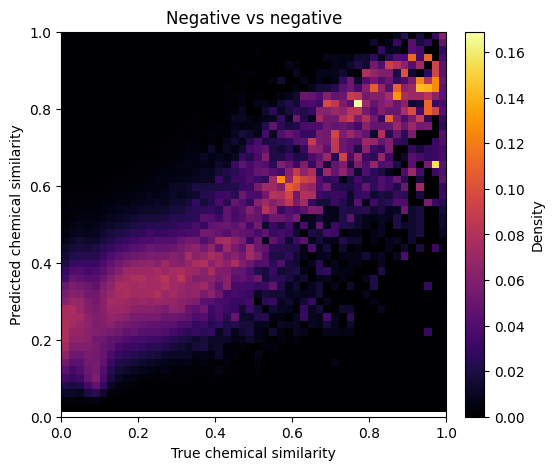

In [99]:
fig = create_heatmap(neg_neg_scores, 50, title="Negative vs negative")
fig.savefig("./heatmap_neg_neg_0_2.svg")


In [93]:
get_pearson_correlation(neg_neg_scores)


PearsonRResult(statistic=0.41796600584060145, pvalue=0.0)


# Make comparison plot with MS2DeepScore 2.0

In [35]:
model_file_name = "ms2deepscore_model.pt"

download_file("https://zenodo.org/records/14290920/files/settings.json?download=1", "ms2deepscore_settings.json")
download_file("https://zenodo.org/records/14290920/files/ms2deepscore_model.pt?download=1", model_file_name)


In [36]:
pos_test_spectra = []
for spectrum in pos_test:
    if spectrum.get("inchikey")[:14] != "FTXGVGWYYREYSV":
        pos_test_spectra.append(spectrum)


In [38]:
from ms2deepscore.benchmarking.CalculateScoresBetweenAllIonmodes import CalculateScoresBetweenAllIonmodes

scores_between_ionmodes = CalculateScoresBetweenAllIonmodes(model_file_name, pos_test_spectra, neg_test, fingerprint_type="daylight", n_bits_fingerprint=4096)

/lustre/BIF/nobackup/jonge094/ms2deepscore/ms2deepscore/ms2deepscore/models/load_model.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_settings = torch.load(filen

Calculating embeddings


24910it [02:36, 159.21it/s]
7142it [00:42, 167.10it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:03<00:00, 238.49it/s]


Calculating tanimoto scores
Calculating embeddings


24910it [02:26, 170.27it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1830/1830 [00:07<00:00, 229.21it/s]


Calculating tanimoto scores
Calculating embeddings


7142it [00:43, 165.32it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:04<00:00, 204.37it/s]


Calculating tanimoto scores


In [50]:
scores_between_ionmodes.pos_vs_pos_scores.label = "MS2Deepscore 2.5.2"
scores_between_ionmodes.neg_vs_neg_scores.label = "MS2Deepscore 2.5.2"
neg_neg_scores.label = "MS2DeepScore 0.2.0"
pos_pos_scores.label = "MS2DeepScore 0.2.0"

In [86]:
from typing import List
from ms2deepscore.utils import create_evenly_spaced_bins


def plot_loss_per_bin_multiple_benchmarks(list_of_predictions_and_tanimoto_scores: List[PredictionsAndTanimotoScores],
                                          nr_of_bins=10,
                                          loss_type="MSE",
                                         title=""):
    """Combines the plot of multiple comparisons into one plot
    """
    ref_score_bins = create_evenly_spaced_bins(nr_of_bins)
    fig, ax1 = plt.subplots(1, 1,
                                   figsize=(6, 5), dpi=300)
    labels = []
    for predictions_and_tanimoto_scores in list_of_predictions_and_tanimoto_scores:
        bin_content, rmses = predictions_and_tanimoto_scores.get_average_loss_per_bin_per_inchikey_pair(
            loss_type, ref_score_bins)
        ax1.plot(np.arange(len(rmses)), rmses, "o:")
        # ax2.plot(np.arange(len(rmses)), bin_content, "o:")
        labels.append(predictions_and_tanimoto_scores.label)
    ax1.legend(labels)
    # fig.legend(labels, loc="upper left")
    ax1.set_title(title)
    ax1.set_ylabel(loss_type)
    ax1.grid(True)

    # ax2.set_title('# of compound pairs')
    # ax2.set_ylabel("# of compound pairs")
    # ax2.set_xlabel("Tanimoto score bin")
    # ax2.set_ylim(bottom=1)
    # ax2.set_yscale('log')
    plt.xticks(np.arange(len(ref_score_bins)),
               [f"{a:.1f} to < {b:.1f}" for (a, b) in ref_score_bins], fontsize=9, rotation='vertical')
    # ax2.grid(True)
    plt.tight_layout()

Selecting available inchikey pairs per bin: 10it [00:00, 45.39it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 47.03it/s]


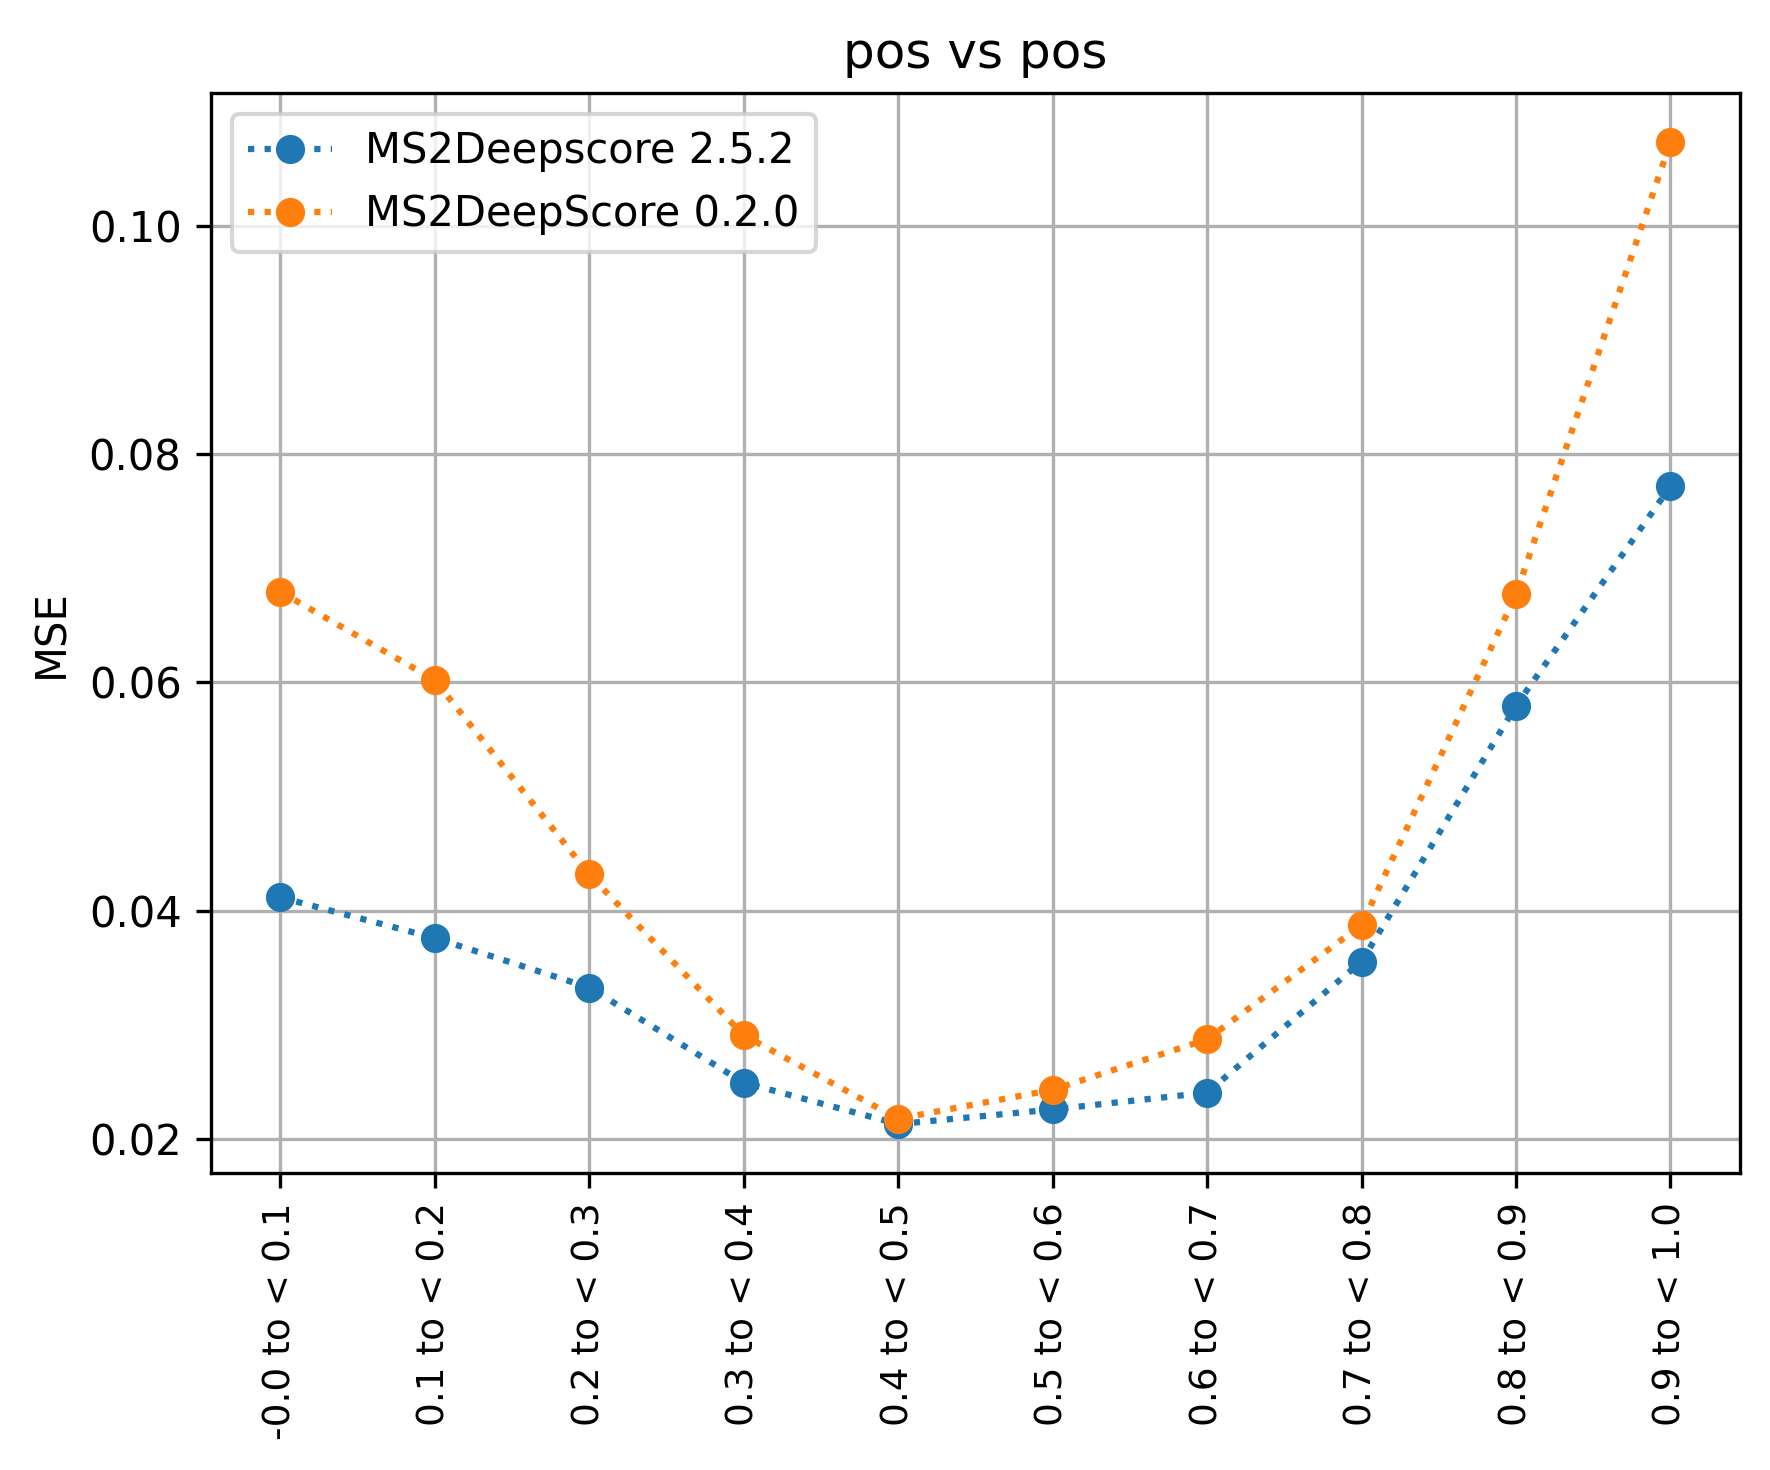

In [87]:
plot_loss_per_bin_multiple_benchmarks([scores_between_ionmodes.pos_vs_pos_scores, pos_pos_scores], title="pos vs pos")
plt.savefig('pos_vs_pos_new_old_comparison.svg',bbox_inches='tight', transparent=True)

Selecting available inchikey pairs per bin: 10it [00:00, 191.75it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 158.71it/s]


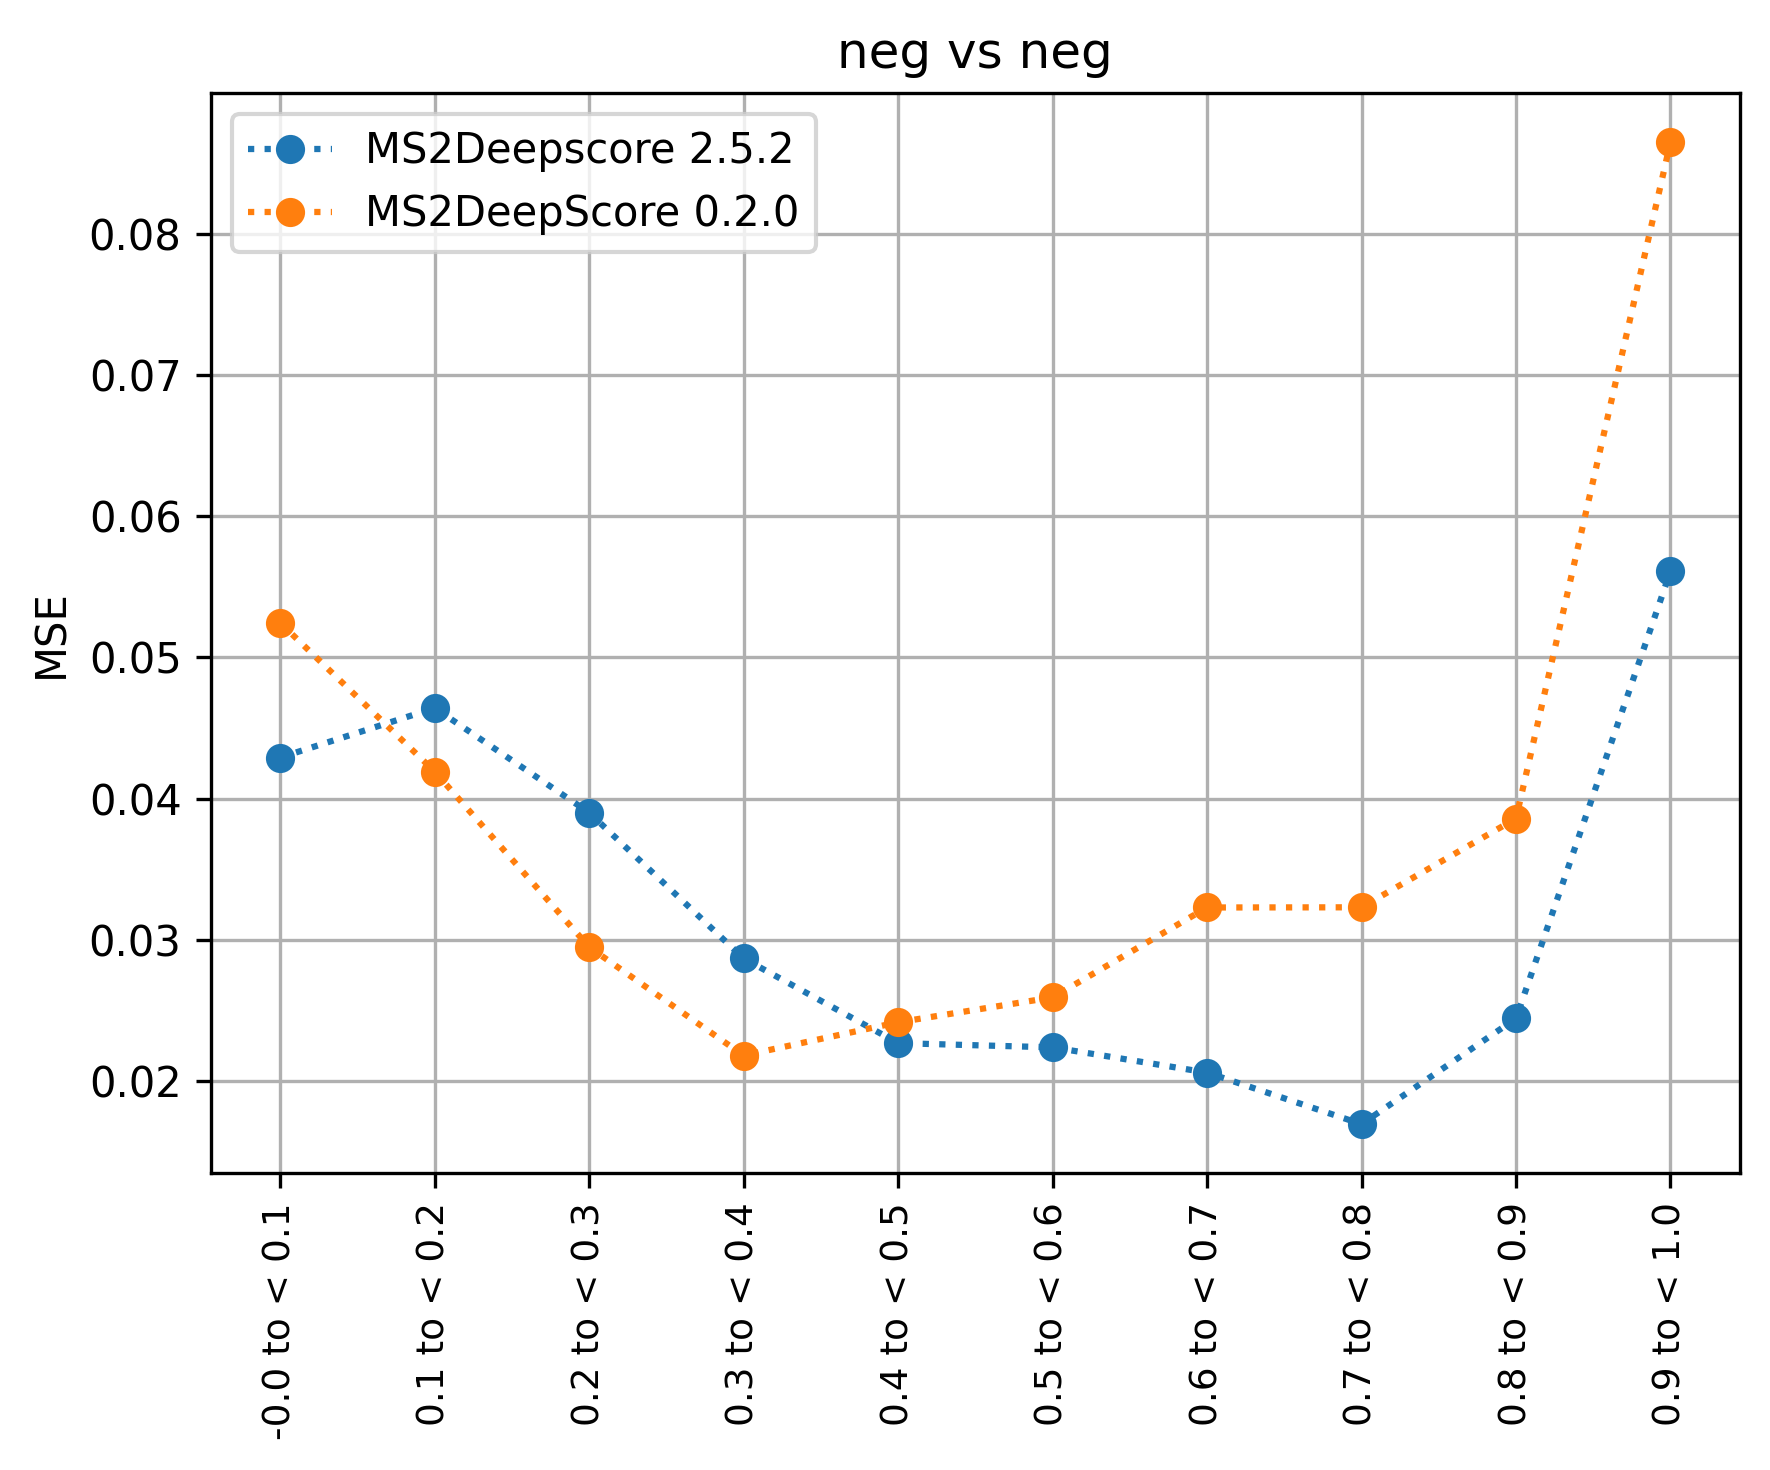

In [88]:
plot_loss_per_bin_multiple_benchmarks([scores_between_ionmodes.neg_vs_neg_scores, neg_neg_scores], title="neg vs neg")
plt.savefig('neg_vs_neg_new_old_comparison.svg',bbox_inches='tight', transparent=True)